In [1]:
import numpy as np
import matplotlib.pyplot as plt

import config
config.conf_matplolib()

from spectral.spherical.transforms import SHExpand

from spectral.spherical.swsh import Yslm_vec
from waveformtools.diagnostics import method_info
from spectral.spherical.grids import GLGrid

/home/vaishakprasad/Projects/custom_libraries/spectral/spectral
/home/vaishakprasad/Projects/custom_libraries/waveformtools/waveformtools
No module named 'pycbc'


In [2]:
ell=20
emm=19
spin_weight = -2

ginfo = GLGrid(L=20)

minfo = method_info(int_method='GL',
                    diff_method='SH',
                    ell_max=ginfo.L,
                    spin_weight=-2)


theta, phi = ginfo.meshgrid

trial_func = 1.4*Yslm_vec(ell=ell,
                      emm=emm,
                      theta_grid=theta,
                      phi_grid=phi,
                      spin_weight=spin_weight)

In [3]:
from qlmtools.plot import plot_surface

/home/vaishakprasad/Installations/anaconda/envs/wftools/lib/python3.12/site-packages/matplotlib/colors.py:788: ComplexWarning: Casting complex values to real discards the imaginary part
  xa = xa.astype(int)
/home/vaishakprasad/Installations/anaconda/envs/wftools/lib/python3.12/site-packages/matplotlib/transforms.py:2875: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/home/vaishakprasad/Installations/anaconda/envs/wftools/lib/python3.12/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  self.figure.savefig(buf, format='png', dpi='figure')


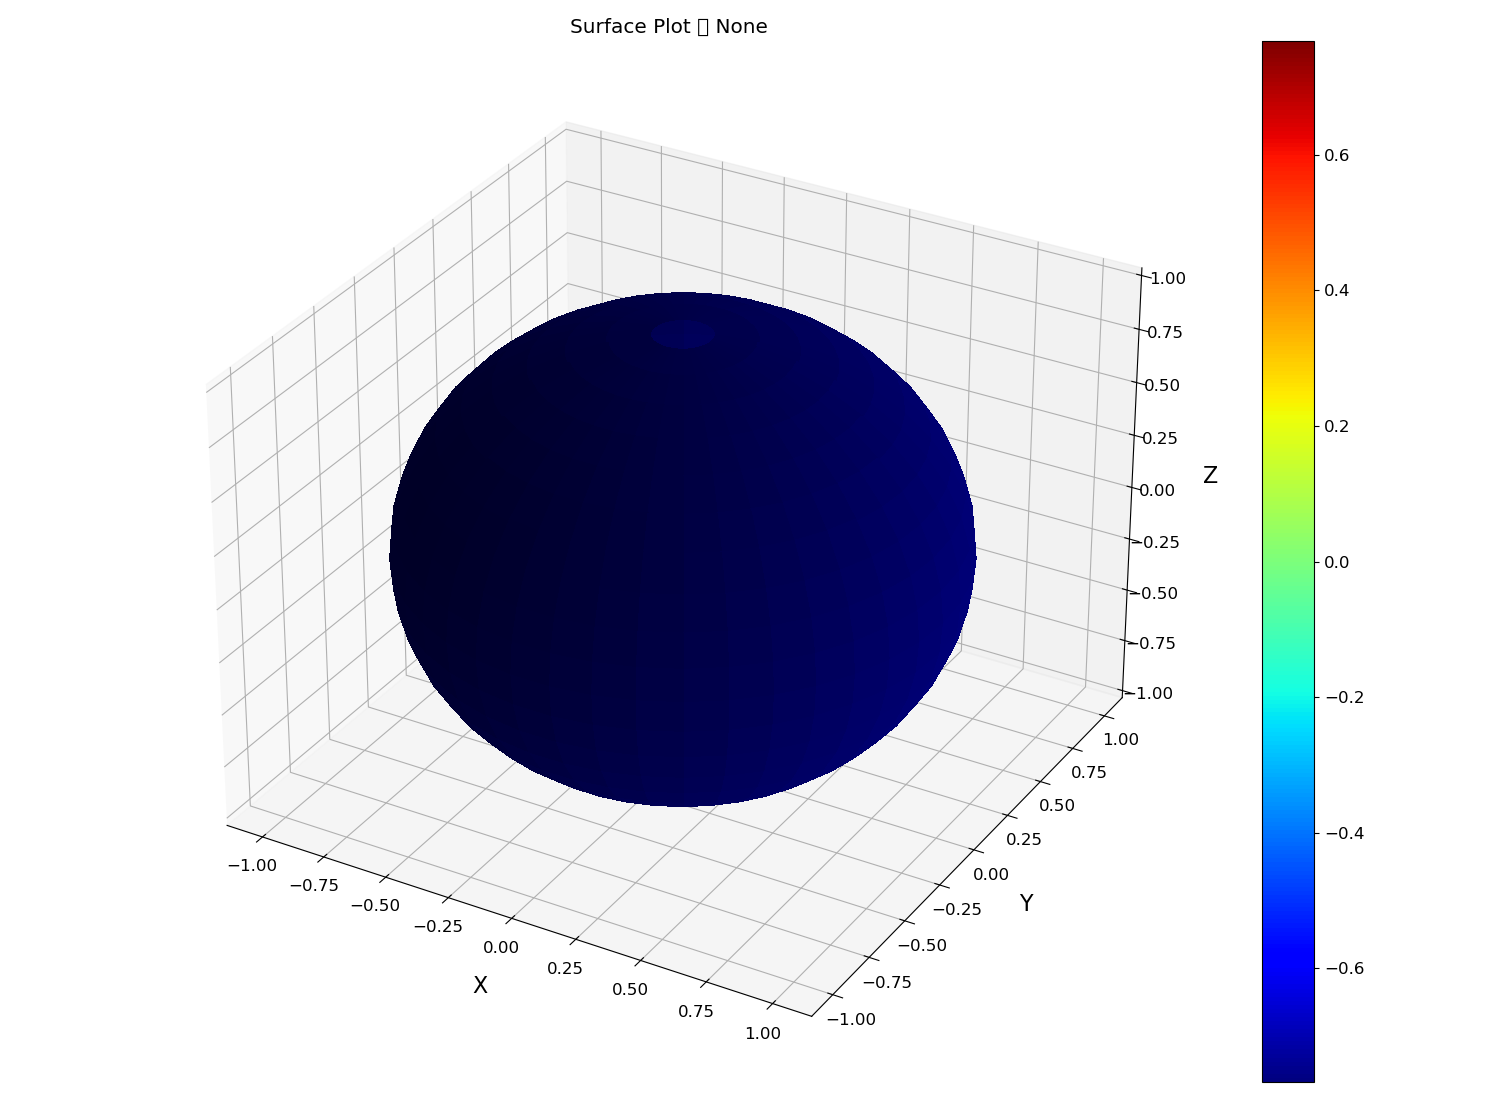

In [4]:
%matplotlib widget

plot_surface(trial_func, ginfo, fname=None)
#plt.show()

In [5]:
np.amax(trial_func), np.amin(trial_func)

((0.76750103760367471275-4.512555043971017634e-15j),
 (-0.76750103760367471275+9.025110087942035268e-15j))

In [6]:
tf_modes = SHExpand(trial_func, 
                    method_info=minfo, 
                    error_info=True, 
                    info=ginfo, 
                    spin_weight=spin_weight)

In [7]:
np.sum(trial_func**2)

(-2.1983734548470384995e-13-7.365585734647045468e-14j)

/home/vaishakprasad/Installations/anaconda/envs/wftools/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vaishakprasad/Installations/anaconda/envs/wftools/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


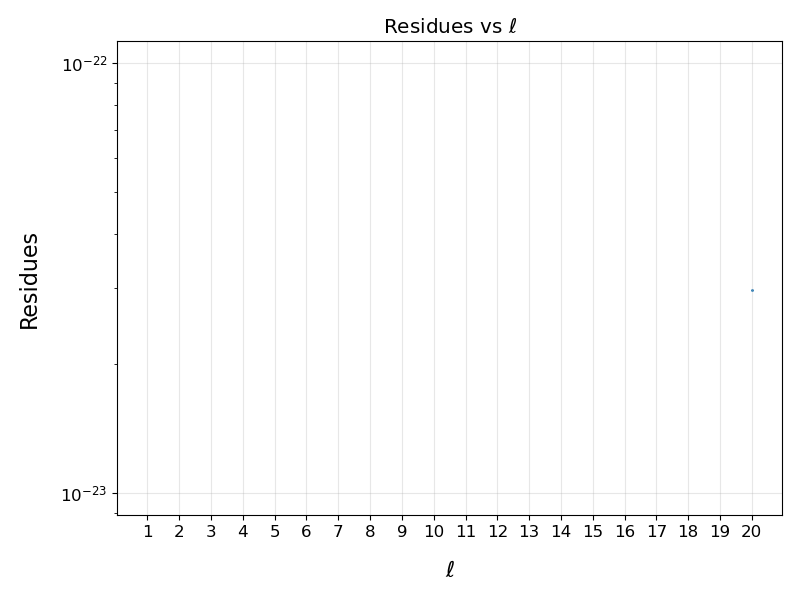

In [19]:
tf_modes.plot_residues()

In [20]:
tf_recon = tf_modes.contract()

In [23]:
np.testing.assert_array_almost_equal(tf_recon, trial_func, 11)

In [24]:
tf_modes.mode(20, 19)

(1.4000000000000022663-1.4781133734258991513e-18j)

In [7]:
tf_modes.compute_waveform_balance_law()

AttributeError: 'SingleMode' object has no attribute 'compute_waveform_balance_law'